# Classification of Mask and No Mask Images using CNN

<h3>Context :</h3>
Quarantine really made things hard for us. And with the increase in corona virus cases all over the world, masks have become necessary or rather compulsory. These images can help in various projects like mask detectors, classifier or real-time camera applications.

<h3>Content :</h3>
There are two folders in the maskdata folder. One folder contains a mixture of images for training and the other for testing.

In [31]:
# Importing necessary Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical # one hot encoding
from keras.models import load_model

import os
import cv2
import matplotlib.pyplot as plt

In [22]:
# Initiating variables with Paths and and Categories

path1 = r'E:\Data Science\DataSets and EDA\CNN\Mask_NoMask'
cate = ['Mask', 'No_Mask']

In [23]:
# Add every image to 'image_file' and convert it to an array 'image_array', later resize it to 100*100 image

input_image = []
image_size = 100

for i in cate:
    folders = os.path.join(path1, i)
    label   = cate.index(i)
    for image in os.listdir(folders):
        image_file = os.path.join(folders, image)
        image_array = cv2.imread(image_file)
        image_array =cv2.resize(image_array , (image_size  , image_size) )
        input_image.append([image_array , label])
#       plt.imshow(image_array)

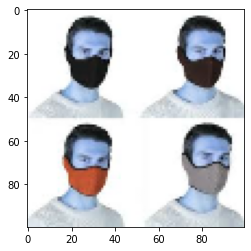

In [24]:
import numpy as np

np.random.shuffle(input_image)

X = []
Y = []

for x_val, labels in input_image:
    X.append(x_val)
    Y.append(labels)
    
X = np.array(X)
Y = np.array(Y)

X = X/255

plt.imshow(X[0])

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

In [26]:
print(X_train.shape)
print(Y_train.shape)

(7066, 100, 100, 3)
(7066,)


In [27]:
model = Sequential() # modelis initialized
model.add(Conv2D(filters = 30, kernel_size = (5, 5), activation= 'relu',)) # Input/convolution layer Info, filters(sliders/kernels)
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Flatten())

model.add(Dense(128, activation= 'relu', input_shape = X_train.shape[1:])) # Hidden Layer
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# adam = tf.keras.optimizers.Adam(lr = 0.01) # its not mandatory default is 0.001

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])
 # 10 is not a hyper parameter
# number of layers in target variable

In [28]:
model.fit(X_train, Y_train, batch_size= 64, epochs=5, validation_split=.2)

Epoch 1/5
89/89 [==============================] - 73s 724ms/step - loss: 0.6889 - accuracy: 0.7951 - val_loss: 0.2822 - val_accuracy: 0.8904
Epoch 2/5
89/89 [==============================] - 67s 756ms/step - loss: 0.2425 - accuracy: 0.9073 - val_loss: 0.2445 - val_accuracy: 0.9095
Epoch 3/5
89/89 [==============================] - 66s 743ms/step - loss: 0.1835 - accuracy: 0.9285 - val_loss: 0.2476 - val_accuracy: 0.9059
Epoch 4/5
89/89 [==============================] - 67s 751ms/step - loss: 0.1248 - accuracy: 0.9536 - val_loss: 0.2303 - val_accuracy: 0.9272
Epoch 5/5
89/89 [==============================] - 69s 779ms/step - loss: 0.0795 - accuracy: 0.9738 - val_loss: 0.2385 - val_accuracy: 0.9222


In [29]:
pred = model.predict(X_test)

pred = np.argmax(pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

tab = confusion_matrix(Y_test, pred)
print('Confusion Matrix : \n Actual Values -> Predicted Values\n \n',tab)
print('\n',classification_report(Y_test, pred))

Confusion Matrix : 
 Actual Values -> Predicted Values
 
 [[874  88]
 [ 61 744]]

               precision    recall  f1-score   support

           0       0.93      0.91      0.92       962
           1       0.89      0.92      0.91       805

    accuracy                           0.92      1767
   macro avg       0.91      0.92      0.92      1767
weighted avg       0.92      0.92      0.92      1767



In [44]:
# Saving the Model to .h5 file to reuse it OpenCV Assignment

model.save("Mask_NoMask.h5")
loaded_model = load_model("Mask_NoMask.h5")
loss, accuracy = loaded_model.evaluate(X_test, Y_test)
print('Loss : \t \t',(loss*100))
print("Accuracy : \t", (accuracy*100))

56/56 [==============================] - 5s 80ms/step - loss: 0.2527 - accuracy: 0.9157
Loss : 	 	 25.267690420150757
Accuracy : 	 91.56762957572937


<h3>Conclusion : </h3>We have manager to achieve a <b>Precision : 92% and Accuracy : 92%</b>